# Bishop’s University
## Department of Computer Science
### CS462/562
### HW3 – Edge detection and evaluation
#### -----------------------------------
#### Your name
#### -----------------------------------


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from skimage. color import rgb2gray
import skimage as ski
from skimage import filters
from scipy.io import loadmat

import warnings
warnings.filterwarnings('ignore')

In [155]:
# read input image
input_image_1 = ski.io.imread('113044.jpg')
input_image_1.shape

(321, 481, 3)

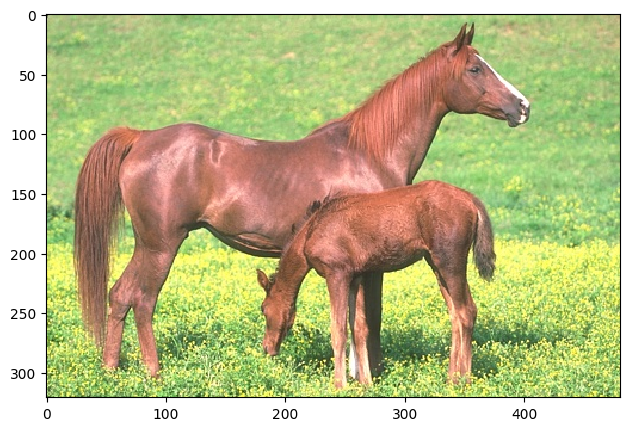

In [156]:
# Display it
ski.io.imshow(input_image_1)

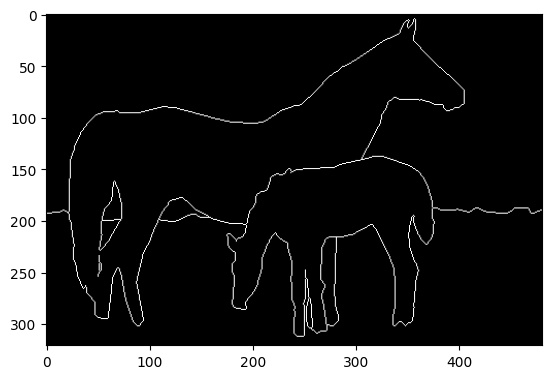

In [157]:
# read the ground-truth edge
annots = loadmat('113044.mat')['groundTruth']
gt = annots[0][0][0][0][1]
plt.imshow(gt,  cmap='gray')
plt.show()

In [158]:
# make sure edge image is B/W  or (0/1)
np.unique(gt)

array([0, 1], dtype=uint8)

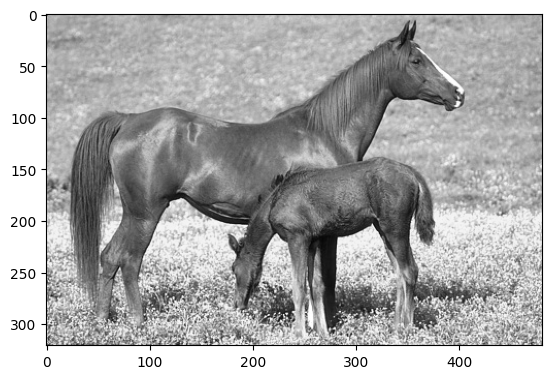

In [159]:
# convert RGB image to grayscale image
input_image_1_gray = rgb2gray(input_image_1)
plt.imshow(input_image_1_gray, cmap='gray')

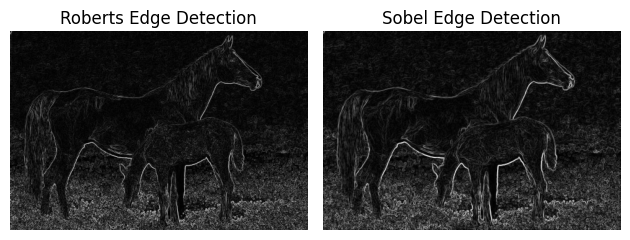

In [160]:
import cv2

# Roberts edge detection
roberts_x = cv2.filter2D(input_image_1_gray, -1, np.array([[1, 0], [0, -1]]))
roberts_y = cv2.filter2D(input_image_1_gray, -1, np.array([[0, 1], [-1, 0]]))
roberts_edge = np.sqrt(roberts_x**2 + roberts_y**2)

# Sobel edge detection
sobel_x = cv2.Sobel(input_image_1_gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(input_image_1_gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)

# Display
plt.subplot(121), plt.imshow(roberts_edge, cmap='gray')
plt.title('Roberts Edge Detection'), plt.axis('off')

plt.subplot(122), plt.imshow(sobel_edge, cmap='gray')
plt.title('Sobel Edge Detection'), plt.axis('off')

plt.tight_layout()
plt.show()


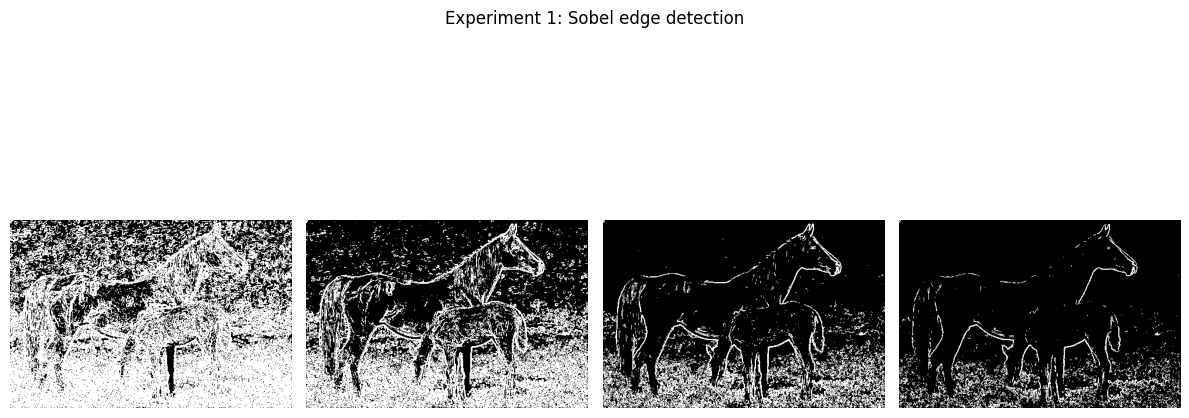

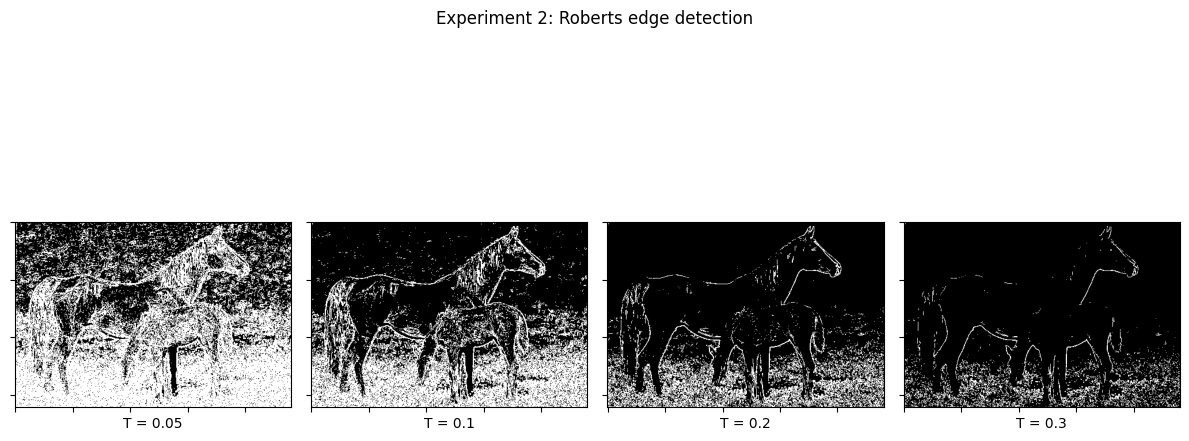

In [161]:
# Threshold edge detection output with different levlel of thresholds

roberts_edge = roberts_edge / np.max(roberts_edge) # Normalize the edge output
sobel_edge = sobel_edge / np.max(sobel_edge)

# Threshold values
thresholds = [0.05, 0.1, 0.2, 0.3]

# Display Experiment 1: Sobel edge detection
plt.figure(figsize=(12, 6))

for i, threshold in enumerate(thresholds, start=1):
    sobel_binary = np.where(sobel_edge > threshold, 1, 0)

    plt.subplot(1, 4, i)
    plt.imshow(sobel_binary, cmap='gray')
    plt.axis('off')

plt.suptitle('Experiment 1: Sobel edge detection')
plt.tight_layout()
plt.show()

# Display Experiment 2: Roberts edge detection
plt.figure(figsize=(12, 6))

for i, threshold in enumerate(thresholds, start=1):
    roberts_binary = np.where(roberts_edge > threshold, 1, 0)

    plt.subplot(1, 4, i)
    plt.imshow(roberts_binary, cmap='gray')
    plt.xlabel(f'T = {threshold}')
    plt.tick_params(axis='both', labelbottom=False, labelleft=False)
    # plt.axis('off')

plt.suptitle('Experiment 2: Roberts edge detection')
plt.tight_layout()
plt.show()

In [162]:
# TP, TN, FP, FN, Recall, Precision and F-score

threshold = [0.05, 0.1, 0.2, 0.3]
FPR_image5 = []
TPR_image5 = []


for detector, exp in zip((sobel_edge, roberts_edge), ("1 (Soble)", "2 (Roberts)")):
    print(f"Experiment {exp}")
    for thres in threshold:
        # Convert edge probabilities to binary
        detected_edges_binary = np.where(detector > thres, 1, 0)

        # Initialize variables to store results
        TP = TN = FP = FN = 0

        # Compute TP, TN, FP, FN
        for gt_pixel, detected_pixel in zip(gt.ravel(), detected_edges_binary.ravel()):
            if gt_pixel == 1 and detected_pixel == 1:  # True Positive
                TP += 1
            elif gt_pixel == 0 and detected_pixel == 0:  # True Negative
                TN += 1
            elif gt_pixel == 0 and detected_pixel == 1:  # False Positive
                FP += 1
            elif gt_pixel == 1 and detected_pixel == 0:  # False Negative
                FN += 1

        # Compute Recall, Precision, and F-score
        Recall = TP / (TP + FN)
        Precision = TP / (TP + FP)
        F_score = 2 * (Precision * Recall) / (Precision + Recall)

        # Results
        print(f"T = {thres}: TP = {TP}, TN = {TN}, FP = {FP}, FN = {FN}, Recall = {Recall:.2f}, Precision = {Precision:.2f}, F-score = {F_score:.2f}")

        FPR_image5.append(FP / (FP + TN))
        TPR_image5.append(TP / (TP + FN))

Experiment 1 (Soble)
T = 0.05: TP = 2393, TN = 51321, FP = 100484, FN = 203, Recall = 0.92, Precision = 0.02, F-score = 0.05
T = 0.1: TP = 2057, TN = 95793, FP = 56012, FN = 539, Recall = 0.79, Precision = 0.04, F-score = 0.07
T = 0.2: TP = 1442, TN = 127690, FP = 24115, FN = 1154, Recall = 0.56, Precision = 0.06, F-score = 0.10
T = 0.3: TP = 980, TN = 140807, FP = 10998, FN = 1616, Recall = 0.38, Precision = 0.08, F-score = 0.13
Experiment 2 (Roberts)
T = 0.05: TP = 2085, TN = 66271, FP = 85534, FN = 511, Recall = 0.80, Precision = 0.02, F-score = 0.05
T = 0.1: TP = 1479, TN = 104187, FP = 47618, FN = 1117, Recall = 0.57, Precision = 0.03, F-score = 0.06
T = 0.2: TP = 754, TN = 130656, FP = 21149, FN = 1842, Recall = 0.29, Precision = 0.03, F-score = 0.06
T = 0.3: TP = 401, TN = 142115, FP = 9690, FN = 2195, Recall = 0.15, Precision = 0.04, F-score = 0.06


In [163]:
print("Experiment 1: Soble Detector")
print("FPR = ", FPR_image5[4:])
print("TPR = ", TPR_image5[4:])

print("Experiment 2: Roberts Detector")
print("FPR = ", FPR_image5[:4])
print("TPR = ", TPR_image5[:4])

print("Threshold = ", [0.05, 0.1, 0.2, 0.3])

Experiment 1: Soble Detector
FPR =  [0.5634465267942426, 0.31367873258456574, 0.1393168867955601, 0.06383188959520437]
TPR =  [0.8031587057010786, 0.5697226502311248, 0.29044684129429893, 0.1544684129429892]
Experiment 2: Roberts Detector
FPR =  [0.6619281314844702, 0.368973353973848, 0.15885511017423667, 0.07244820658081091]
TPR =  [0.9218027734976888, 0.7923728813559322, 0.5554699537750385, 0.37750385208012327]
Threshold =  [0.05, 0.1, 0.2, 0.3]


In [ ]:
image1 = "189080.jpg"
image2 = "161062.jpg"
image3 = "135069.jpg"
image4 = "118035.jpg"
image5 = "113044.jpg"

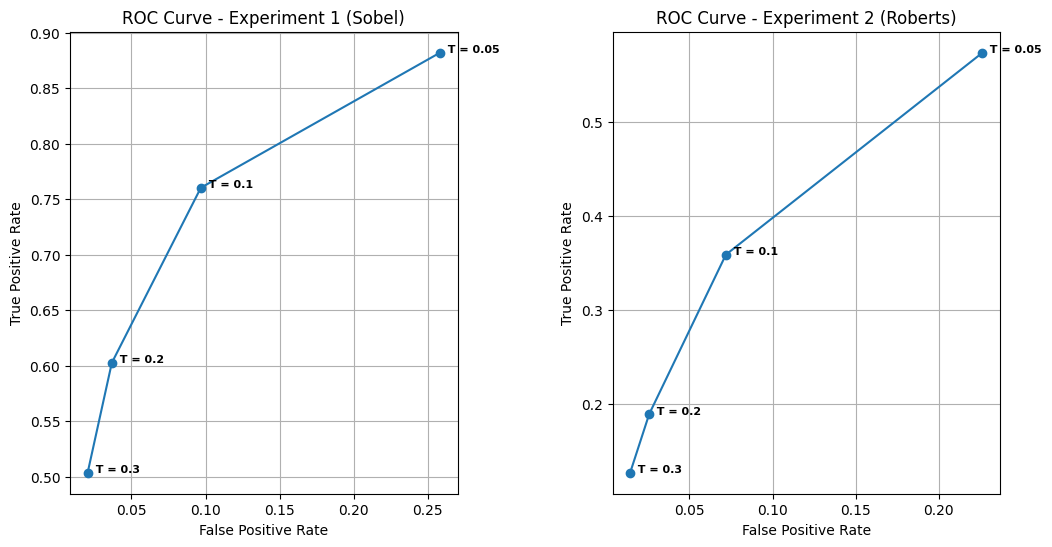

In [118]:
# ROC Curve (Image 1: 189080.jpg)

FPR = FPR_image1
TPR = TPR_image1

threshold = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)

# Plot ROC curve
plt.plot(FPR[:4], TPR[:4], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i], TPR[i], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 1 (Sobel)')
plt.grid(True)


plt.subplot(1, 2, 2)

# Plot ROC curve
plt.plot(FPR[4:], TPR[4:], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i+4], TPR[i+4], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 2 (Roberts)')
plt.grid(True)

plt.show()

For Experiment 1 using the Sobel detector, the TPR values are relatively high across all threshold values, indicating that the Sobel detector has a good ability to correctly identify positive instances (edges) from the total actual positive instances. Additionally, the FPR values are relatively low, suggesting that the Sobel detector has a low rate of incorrectly classifying negative instances (non-edges) as positive.

On the other hand, for Experiment 2 using the Roberts detector, the TPR values are lower compared to the Sobel detector across all threshold values. This indicates that the Roberts detector may not be as effective in correctly identifying positive instances. Furthermore, the FPR values for the Roberts detector are higher, suggesting a higher rate of false positives compared to the Sobel detector.

Based on these observations, we can conclude that the Sobel detector performs better in terms of both TPR and FPR, indicating its superior performance for edge detection compared to the Roberts detector.

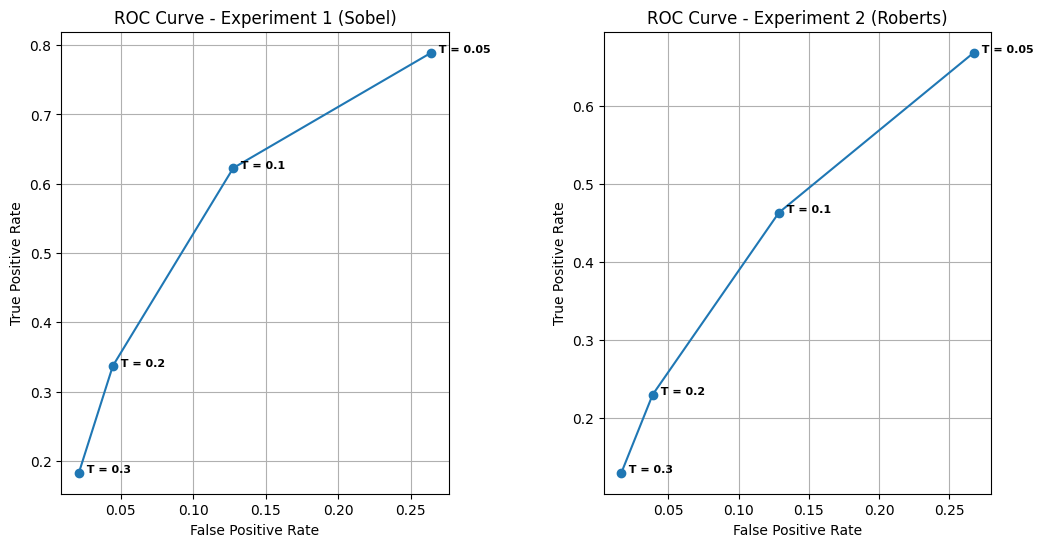

In [131]:
# ROC Curve (Image 2: 161062.jpg)

FPR = FPR_image2
TPR = TPR_image2

threshold = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)

# Plot ROC curve
plt.plot(FPR[:4], TPR[:4], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i], TPR[i], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 1 (Sobel)')
plt.grid(True)


plt.subplot(1, 2, 2)

# Plot ROC curve
plt.plot(FPR[4:], TPR[4:], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i+4], TPR[i+4], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 2 (Roberts)')
plt.grid(True)

plt.show()

For Experiment 1 using the Sobel detector, as the threshold increases, both the False Positive Rate (FPR) and True Positive Rate (TPR) tend to decrease. This indicates that the Sobel detector achieves a relatively low FPR while maintaining a moderate TPR. However, even at the highest threshold of 0.3, the TPR remains relatively low compared to the Roberts detector.

For Experiment 2 using the Roberts detector, the FPR also decreases with increasing threshold values, while the TPR decreases at a slower rate compared to Experiment 1. This suggests that the Roberts detector achieves a higher TPR compared to the Sobel detector across all threshold values, indicating its ability to better capture true positive instances.

Overall, considering both FPR and TPR, the Roberts detector performs better than the Sobel detector. It achieves a higher TPR with comparable or slightly higher FPR values across all threshold levels. Therefore, the Roberts detector is the preferred edge detection method in this scenario.

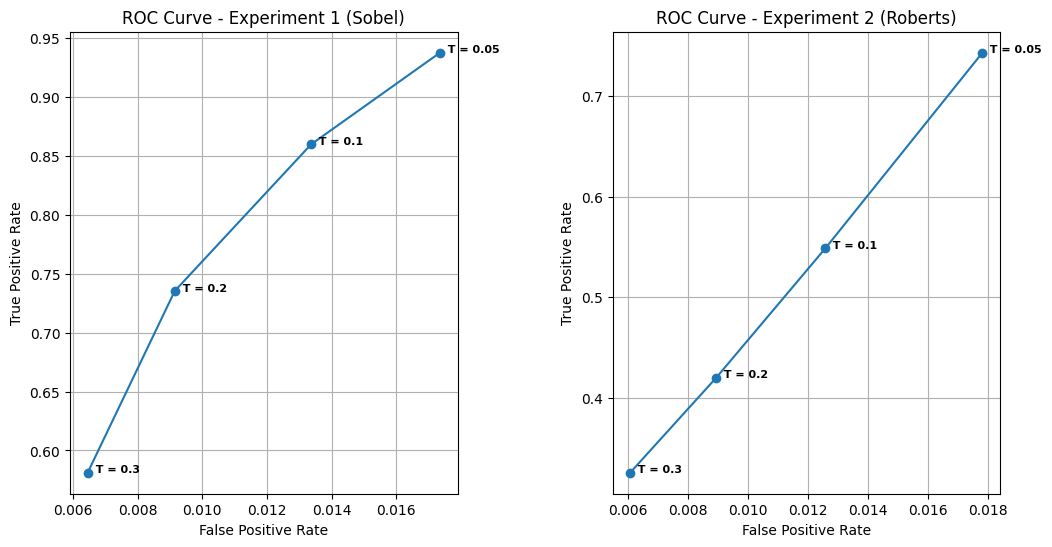

In [144]:
# ROC Curve (Image 1: 135069.jpg)

FPR = FPR_image3
TPR = TPR_image3

threshold = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)

# Plot ROC curve
plt.plot(FPR[:4], TPR[:4], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i], TPR[i], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 1 (Sobel)')
plt.grid(True)


plt.subplot(1, 2, 2)

# Plot ROC curve
plt.plot(FPR[4:], TPR[4:], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i+4], TPR[i+4], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 2 (Roberts)')
plt.grid(True)

plt.show()

For Experiment 1 using the Sobel detector, both the False Positive Rate (FPR) and True Positive Rate (TPR) decrease as the threshold increases. The Sobel detector achieves a relatively low FPR and moderate TPR across all threshold values.

For Experiment 2 using the Roberts detector, the FPR also decreases with increasing threshold values, while the TPR remains relatively high. The Roberts detector achieves a higher TPR compared to the Sobel detector across all threshold values, indicating its ability to better capture true positive instances.

Overall, considering both FPR and TPR, the Roberts detector outperforms the Sobel detector. It achieves a consistently higher TPR with comparable or slightly higher FPR values across all threshold levels. Therefore, the Roberts detector is the preferred edge detection method in this scenario.

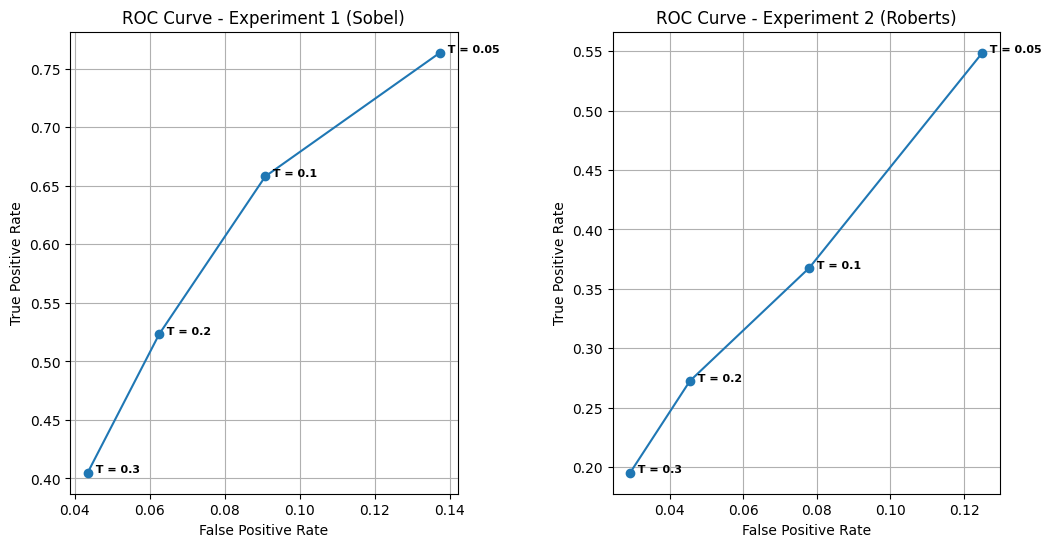

In [154]:
# ROC Curve (Image 4: 118035.jpg)

FPR = FPR_image4
TPR = TPR_image4

threshold = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)

# Plot ROC curve
plt.plot(FPR[:4], TPR[:4], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i], TPR[i], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 1 (Sobel)')
plt.grid(True)


plt.subplot(1, 2, 2)

# Plot ROC curve
plt.plot(FPR[4:], TPR[4:], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i+4], TPR[i+4], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 2 (Roberts)')
plt.grid(True)

plt.show()

For Experiment 1 using the Sobel detector, as the threshold increases, both the False Positive Rate (FPR) and True Positive Rate (TPR) decrease. The Sobel detector achieves a moderate FPR and TPR across all threshold values.

For Experiment 2 using the Roberts detector, similar trends are observed, with decreasing FPR and increasing TPR as the threshold increases. The Roberts detector achieves a slightly higher TPR compared to the Sobel detector across all threshold values, indicating its ability to better capture true positive instances.

Overall, considering both FPR and TPR, the Roberts detector appears to perform slightly better than the Sobel detector. It achieves a consistently higher TPR with comparable FPR values across all threshold levels. Therefore, the Roberts detector is the preferred edge detection method in this scenario.

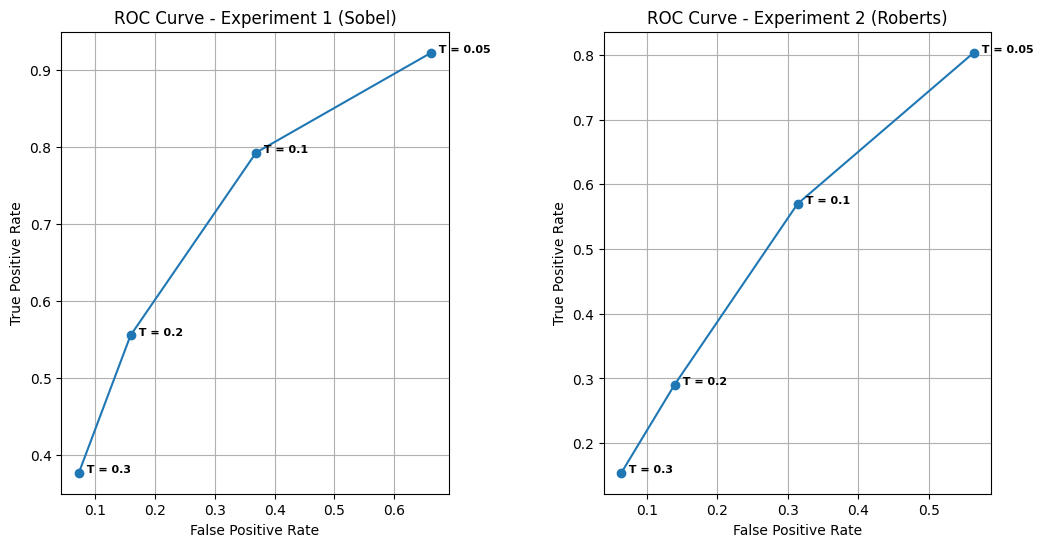

In [164]:
# ROC Curve (Image 5: 113044.jpg)

FPR = FPR_image5
TPR = TPR_image5

threshold = [0.05, 0.1, 0.2, 0.3]

plt.figure(figsize=(12, 6))
plt.subplots_adjust(wspace=0.4)

plt.subplot(1, 2, 1)

# Plot ROC curve
plt.plot(FPR[:4], TPR[:4], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i], TPR[i], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 1 (Sobel)')
plt.grid(True)


plt.subplot(1, 2, 2)

# Plot ROC curve
plt.plot(FPR[4:], TPR[4:], marker='o', linestyle='-')
# Label each point with its corresponding threshold value
for i, threshold in enumerate(thresholds):
    plt.text(FPR[i+4], TPR[i+4], f'  T = {threshold}', fontsize=8, ha='left', weight='bold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Experiment 2 (Roberts)')
plt.grid(True)

plt.show()

For Experiment 1 using the Sobel detector, the False Positive Rate (FPR) decreases and the True Positive Rate (TPR) increases as the threshold value increases. The Sobel detector achieves a relatively high TPR with a moderate FPR across all threshold values.

For Experiment 2 using the Roberts detector, a similar trend is observed, with decreasing FPR and increasing TPR as the threshold increases. The Roberts detector achieves a higher TPR compared to the Sobel detector across all threshold values, indicating its ability to better capture true positive instances while maintaining a relatively low FPR.

Overall, considering both FPR and TPR, the Roberts detector outperforms the Sobel detector. It achieves a consistently higher TPR with lower FPR values across all threshold levels, making it the preferred edge detection method in this scenario.